In [3]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns 

In [4]:
courses_df = pd.read_csv('OULAD/anonymiseddata/courses.csv')
student__assesment_df = pd.read_csv('OULAD/anonymiseddata/studentAssessment.csv')
assessment_df = pd.read_csv('OULAD/anonymiseddata/assessments.csv')
student_info_df = pd.read_csv('OULAD/anonymiseddata/studentInfo.csv')
student_vle_df = pd.read_csv('OULAD/anonymiseddata/studentVle.csv')


In [44]:
stacked_df = pd.concat([courses_df, student__assesment_df, assessment_df,student_info_df,student_vle_df],axis = 1)

subset_df = pd.DataFrame(stacked_df[['id_student', 'code_presentation', 'module_presentation_length','assessment_type','score', 'gender', 'region', 'imd_band','age_band', 'num_of_prev_attempts','highest_education', 'sum_click','final_result']])

if subset_df.columns.duplicated().any():
    print('Duplicates exist')
    subset_df = subset_df.loc[:, ~subset_df.columns.duplicated()]
subset_df = subset_df.replace('', np.nan).dropna(axis=0)
print(subset_df)

Duplicates exist
    id_student code_presentation  module_presentation_length assessment_type  \
0      11391.0             2013J                       268.0             TMA   
1      28400.0             2014J                       269.0             TMA   
2      31604.0             2013J                       268.0             TMA   
3      32885.0             2014J                       262.0             TMA   
4      38053.0             2013B                       240.0             TMA   
5      45462.0             2014B                       234.0            Exam   
6      45642.0             2014J                       269.0             TMA   
7      52130.0             2014B                       241.0             TMA   
8      53025.0             2013J                       261.0             TMA   
10     58873.0             2013B                       240.0             TMA   
11     59185.0             2014B                       241.0            Exam   
12     62155.0         

In [6]:
'''
Because the dataset has been reduced to a very small amount, this project is just to play around & practice, no reasonable assumptions can be deduced from analysis.
'''

'\nBecause the dataset has been reduced to a very small amount, this project is just to play around & practice, no reasonable assumptions can be deduced from analysis.\n'

In [45]:
'''IN ORDER TO VISUALISE THE DATA, WE NEED TO CONVERT THE 'imd_band' COLUMN TO INT VALUES.'''
imd_list = []
sd = subset_df['imd_band']
for n in sd:
    if '-' in n:
        range_values = n.split('-')
        numerical_values = [int(value.strip('%')) for value in range_values]
        average_value = sum(numerical_values) / len(numerical_values)
        # average_value = (f'{average_value}%')
        imd_list.append(average_value)
    else:
        imd_list.append(int(n.strip('%')))  # assuming non-range values are single numbers
print(imd_list)


[95.0, 25.0, 35.0, 55.0, 55.0, 85.0, 35.0, 95.0, 75.0, 75.0, 25.0, 65.0, 55.0, 45.0, 75.0, 65.0, 15.0, 35.0, 35.0, 5.0]


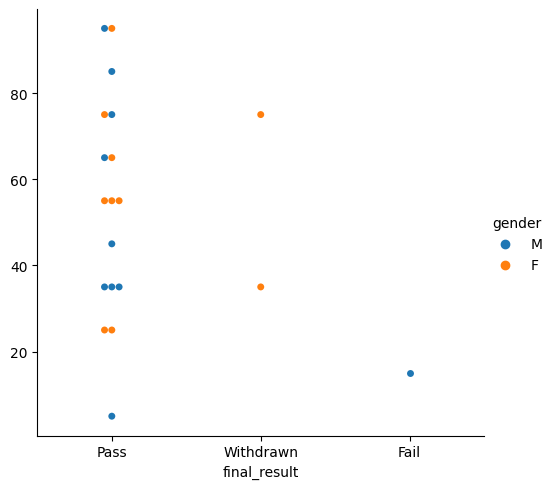

In [46]:
'''
It is common to describe how relatively deprived a neighbourhood is by saying whether
it falls among the most deprived 10 per cent, 20 per cent or 30 per cent of small areas
in England (although there is no definitive cut-off at which an area is described as
'deprived'). Measure the relationship between Indices of multiple deprivation (IMD) and student performance. 

'''

sns.catplot(data=subset_df,x='final_result',y=imd_list,hue='gender',kind='swarm')

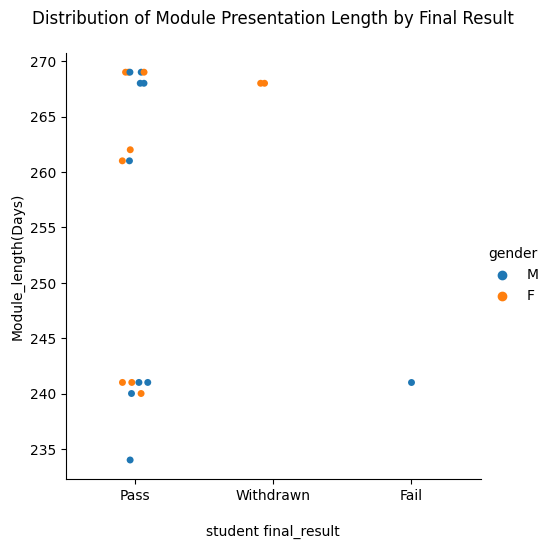

In [31]:
'''
We can also try to explore the length of the module it's contribution to student performance.
'''

plot = sns.catplot(data=subset_df, x='final_result', y='module_presentation_length', hue='gender')
plt.title('Distribution of Module Presentation Length by Final Result\n')

# Set y-axis label
plt.ylabel('Module_length(Days)')
plt.xlabel('\nstudent final_result')

# Show the plot
plt.show()



Text(0.5, 29.140624999999986, '\nfinal result')

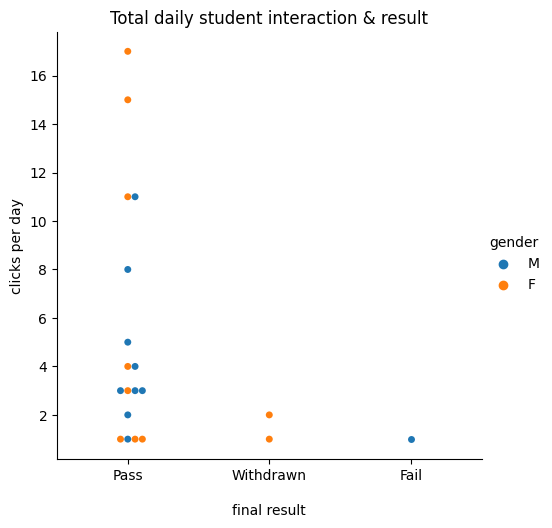

In [33]:
'''Relationship between the total student interaction with material (sum_click) each day and the student performance.'''
sns.catplot(data=subset_df,x='final_result',y='sum_click',hue='gender',kind='swarm')
plt.title('Total daily student interaction & result')
plt.ylabel('clicks per day')
plt.xlabel('\nfinal result')

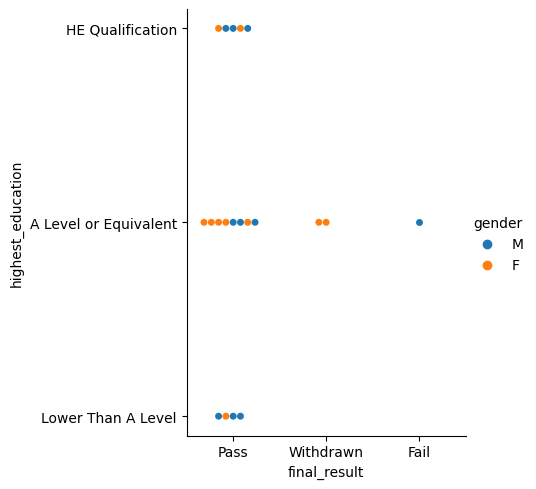

In [38]:
'''
Relationship between highest level of education and student performance.
'''
sns.catplot(data=subset_df,x='final_result',y='highest_education',hue='gender',kind='swarm')

Text(36.67594444444445, 0.5, 'score')

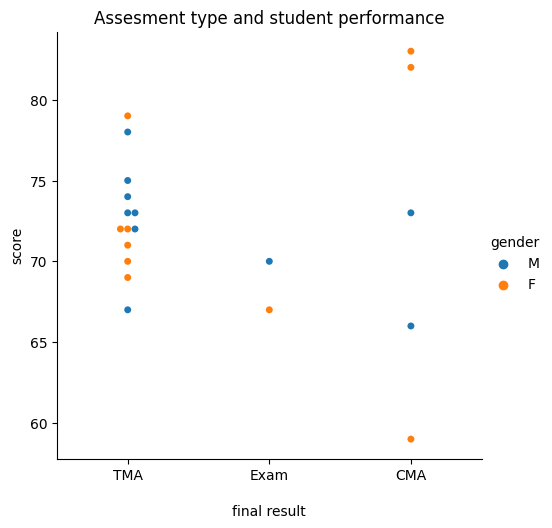

In [40]:
'''Relationship between assessment type and student score.
TMA = TEACHER MARKED ASSESSMENT
CMA = COMPUTER MARKED ASSESSMENT
'''
sns.catplot(data=subset_df,x='assessment_type',y='score',hue='gender',kind='swarm')
plt.title('Assesment type and student performance')
plt.xlabel('\nfinal result')
plt.ylabel('score')